## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade |
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [34]:
import dtreeviz
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Criar um DataFrame
columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
    'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
df = pd.DataFrame(np.column_stack([data, target]), columns=columns)

In [52]:
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [51]:
result_series = pd.Series(['N', 'P', 'N', 'N', 'N'], name='MEDV', dtype='category')

# Concatenar a 'result_series' com o DataFrame existente
df_result = pd.concat([df, result_series], axis=1)

# Exibir apenas a coluna 'MEDV' do DataFrame concatenado
print(df_result['MEDV'])

     MEDV MEDV
0    24.0    N
1    21.6    P
2    34.7    N
3    33.4    N
4    36.2    N
..    ...  ...
501  22.4  NaN
502  20.6  NaN
503  23.9  NaN
504  22.0  NaN
505  11.9  NaN

[506 rows x 2 columns]


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

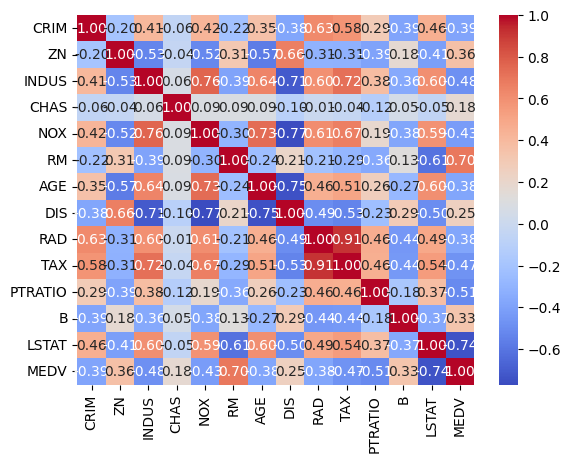

In [53]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Seleção de features e target
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Divisão dos dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicialização e treinamento da árvore de decisão
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predição no conjunto de treinamento
y_train_pred = tree_model.predict(X_train)

# Avaliação do modelo no conjunto de treinamento
mse_train = mean_squared_error(y_train, y_train_pred)
print(f'Mean Squared Error on Training Set: {mse_train}')


Mean Squared Error on Training Set: 0.0


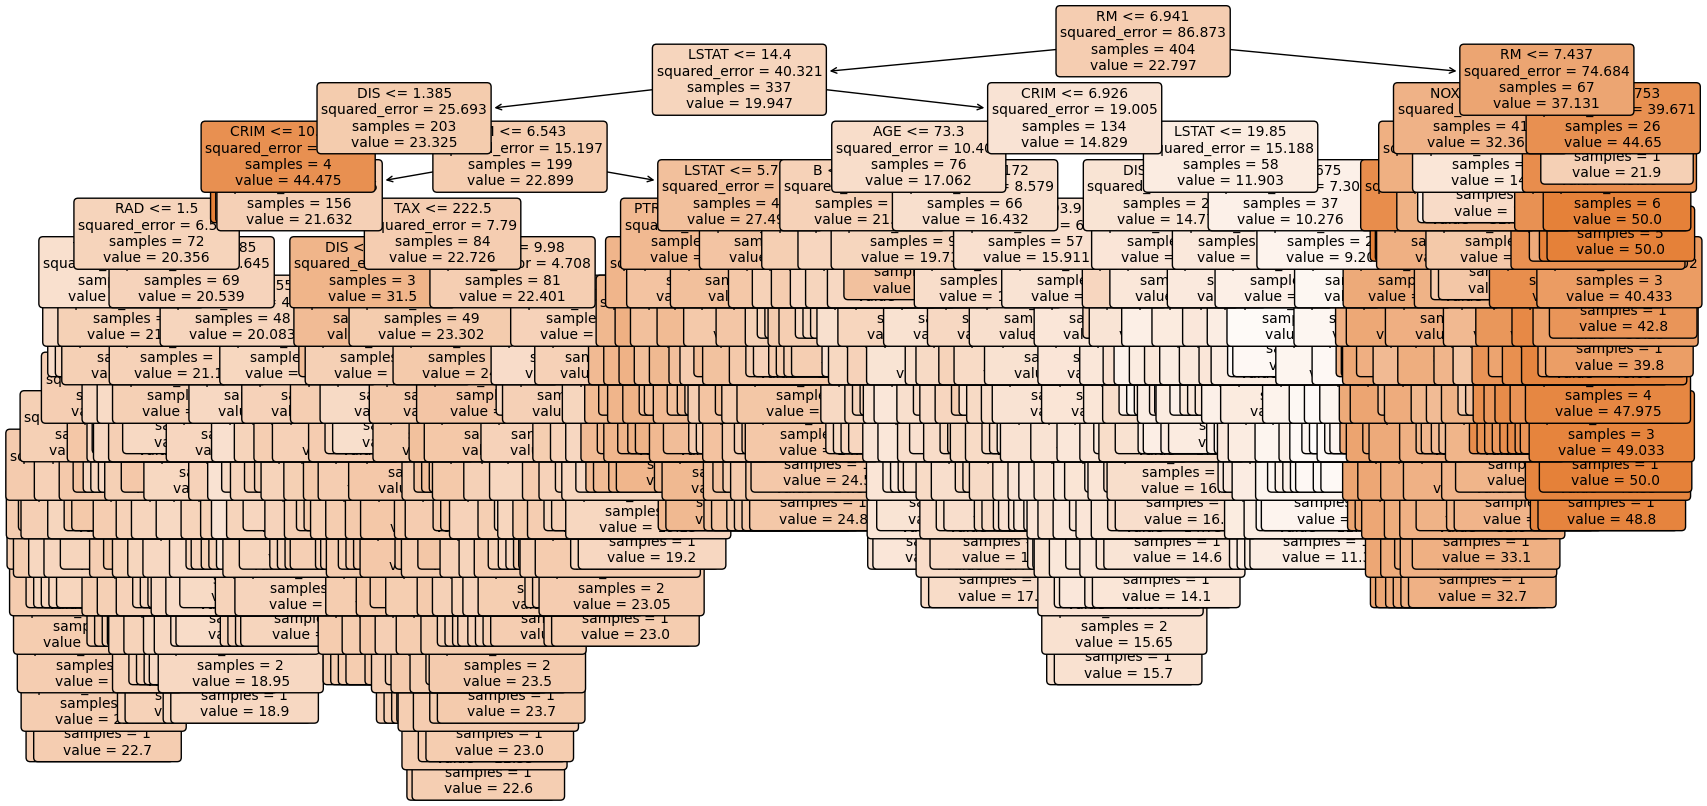

In [55]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualização padrão da árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=X.columns, rounded=True, fontsize=10)
plt.show()


### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [42]:
# Extrair os caminhos indicados pelos CCP-alfas
path = tree_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Exibir os valores de alpha
print("Valores de alpha para poda:")
print(ccp_alphas)


Valores de alpha para poda:
[0.00000000e+00 3.51753830e-17 1.40701532e-16 1.40701532e-16
 5.62806127e-16 5.62806127e-16 5.62806127e-16 5.62806127e-16
 1.12561225e-15 1.68841838e-15 2.02610206e-14 1.23762376e-05
 1.23762376e-05 1.23762376e-05 1.23762376e-05 1.23762376e-05
 1.23762376e-05 1.23762376e-05 1.23762376e-05 1.23762376e-05
 1.23762376e-05 1.23762376e-05 1.23762376e-05 1.23762376e-05
 1.23762376e-05 1.23762376e-05 1.23762376e-05 1.23762376e-05
 1.23762376e-05 1.23762376e-05 1.23762376e-05 1.23762376e-05
 1.23762376e-05 1.23762376e-05 1.23762376e-05 1.23762376e-05
 1.23762376e-05 1.23762376e-05 1.23762376e-05 1.23762376e-05
 1.23762376e-05 1.65016502e-05 1.65016502e-05 3.71287129e-05
 3.71287129e-05 3.71287129e-05 3.71287129e-05 3.71287129e-05
 3.71287129e-05 4.95049505e-05 4.95049505e-05 4.95049505e-05
 4.95049505e-05 4.95049505e-05 4.95049505e-05 4.95049505e-05
 4.95049505e-05 4.95049505e-05 4.95049505e-05 4.95049505e-05
 6.60066007e-05 1.01072607e-04 1.03135314e-04 1.03135314e

In [46]:
from sklearn.tree import DecisionTreeRegressor

# Lista para armazenar as árvores podadas
pruned_trees = []

# Extrair os caminhos indicados pelos CCP-alfas
path = tree_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Iterar sobre os valores de alpha e treinar árvores podadas
for alpha in ccp_alphas:
    pruned_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    pruned_tree.fit(X_train, y_train)
    pruned_trees.append(pruned_tree)

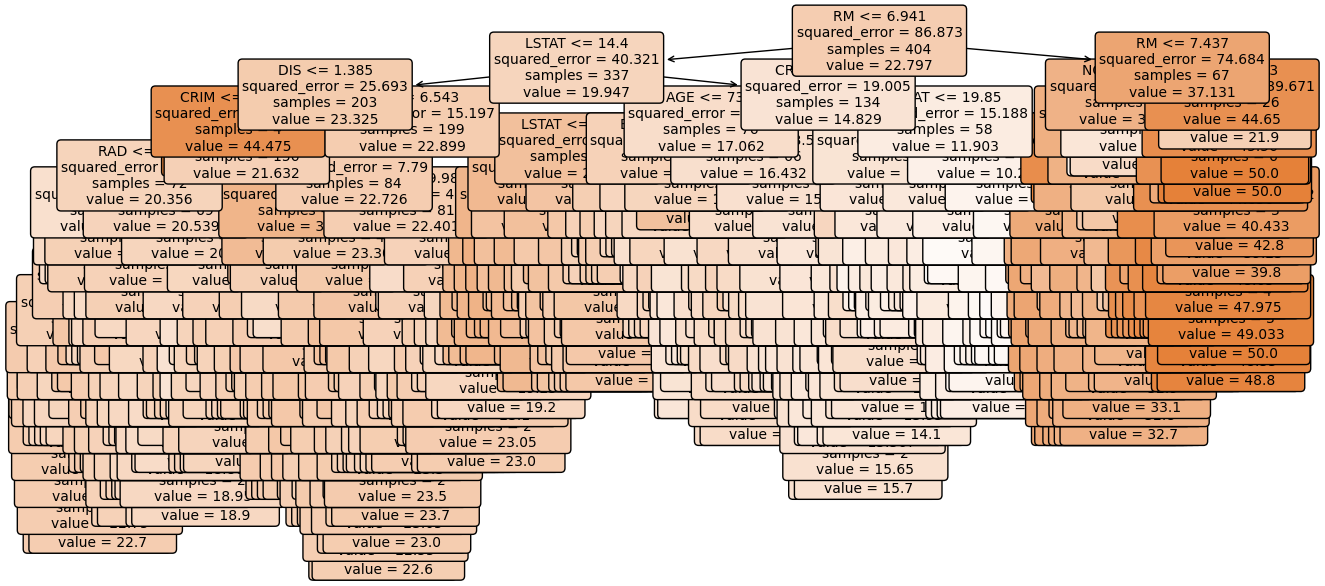

In [57]:
# Importar bibliotecas necessárias
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Escolher se deseja visualizar todas as árvores podadas ou apenas uma específica
visualize_all_trees = False # Defina como True para visualizar todas as árvores, False para visualizar apenas uma

if visualize_all_trees:
   # Plotar todas as árvores podadas na lista
    for i, pruned_tree in enumerate(pruned_trees):
        plt.figure(figsize=(15, 7))
        plt.title(f'Pruned Decision Tree - Alpha={ccp_alphas[i]:.4f}')
        plot_tree(pruned_tree, filled=True, feature_names=X.columns, rounded=True, fontsize=10)
        plt.show()
else:
    # Escolher o índice da árvore podada específica a ser visualizada
    tree_index_to_visualize = 0  # Altere este índice conforme necessário


  # Plotar a árvore podada selecionada
    plt.figure(figsize=(15, 7))
    plt.title(f'Pruned Decision Tree - Alpha={ccp_alphas[tree_index_to_visualize]:.4f}')
    plot_tree(pruned_trees[tree_index_to_visualize], filled=True, feature_names=X.columns, rounded=True, fontsize=10)
    plt.show()


### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [58]:
from sklearn.metrics import mean_squared_error

# Calcular o MSE para cada árvore na lista
for i, pruned_tree in enumerate(pruned_trees):
    y_pred = pruned_tree.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'MSE para árvore {i+1}: {mse:.4f}')


MSE para árvore 1: 10.4161
MSE para árvore 2: 10.4161
MSE para árvore 3: 10.4161
MSE para árvore 4: 10.4161
MSE para árvore 5: 10.4161
MSE para árvore 6: 10.4161
MSE para árvore 7: 10.4161
MSE para árvore 8: 10.4161
MSE para árvore 9: 10.4161
MSE para árvore 10: 10.4161
MSE para árvore 11: 10.4161
MSE para árvore 12: 10.4161
MSE para árvore 13: 10.4161
MSE para árvore 14: 10.4170
MSE para árvore 15: 10.4170
MSE para árvore 16: 10.4170
MSE para árvore 17: 10.4170
MSE para árvore 18: 10.4131
MSE para árvore 19: 10.4131
MSE para árvore 20: 10.4131
MSE para árvore 21: 10.4165
MSE para árvore 22: 10.4165
MSE para árvore 23: 10.4165
MSE para árvore 24: 10.4165
MSE para árvore 25: 10.4154
MSE para árvore 26: 10.4154
MSE para árvore 27: 10.4154
MSE para árvore 28: 10.4154
MSE para árvore 29: 10.4154
MSE para árvore 30: 10.4154
MSE para árvore 31: 10.4146
MSE para árvore 32: 10.4143
MSE para árvore 33: 10.4143
MSE para árvore 34: 10.4143
MSE para árvore 35: 10.4143
MSE para árvore 36: 10.4176
M

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

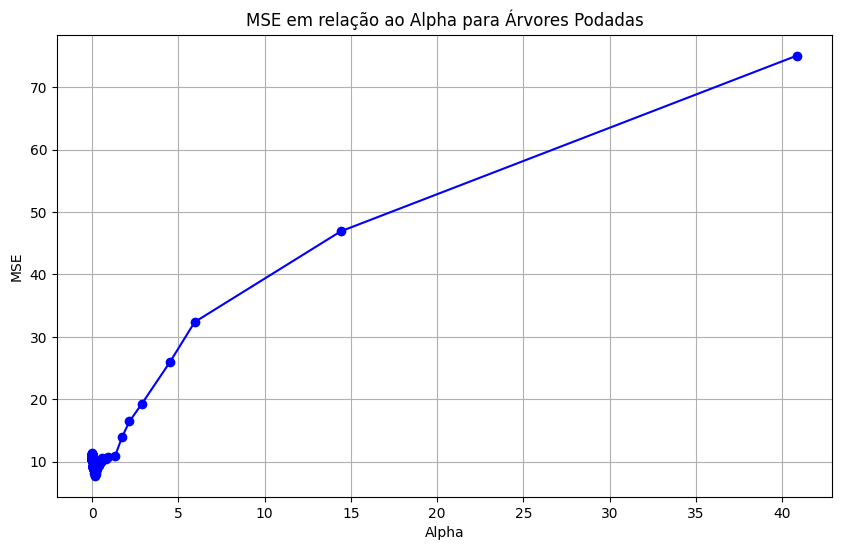

Valor de alpha escolhido: 0.1733


In [59]:
import matplotlib.pyplot as plt

# Calcular o MSE para cada árvore na lista
mse_values = []
for pruned_tree in pruned_trees:
    y_pred = pruned_tree.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plotar o gráfico do MSE pelo alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, mse_values, marker='o', linestyle='-', color='b')
plt.title('MSE em relação ao Alpha para Árvores Podadas')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

# Escolher um valor de alpha perto do ponto de mínimo do MSE
index_min_mse = mse_values.index(min(mse_values))
selected_alpha = ccp_alphas[index_min_mse]
print(f'Valor de alpha escolhido: {selected_alpha:.4f}')



### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [60]:
from sklearn.metrics import r2_score

# Treinar uma árvore com o valor de alpha escolhido
pruned_tree_selected_alpha = DecisionTreeRegressor(random_state=42, ccp_alpha=selected_alpha)
pruned_tree_selected_alpha.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_selected_alpha = pruned_tree_selected_alpha.predict(X_test)

# Calcular o R-quadrado
r2 = r2_score(y_test, y_pred_selected_alpha)

print(f'R-quadrado para a árvore com alpha escolhido: {r2:.4f}')


R-quadrado para a árvore com alpha escolhido: 0.8942


### 7. Visualize esta árvore.

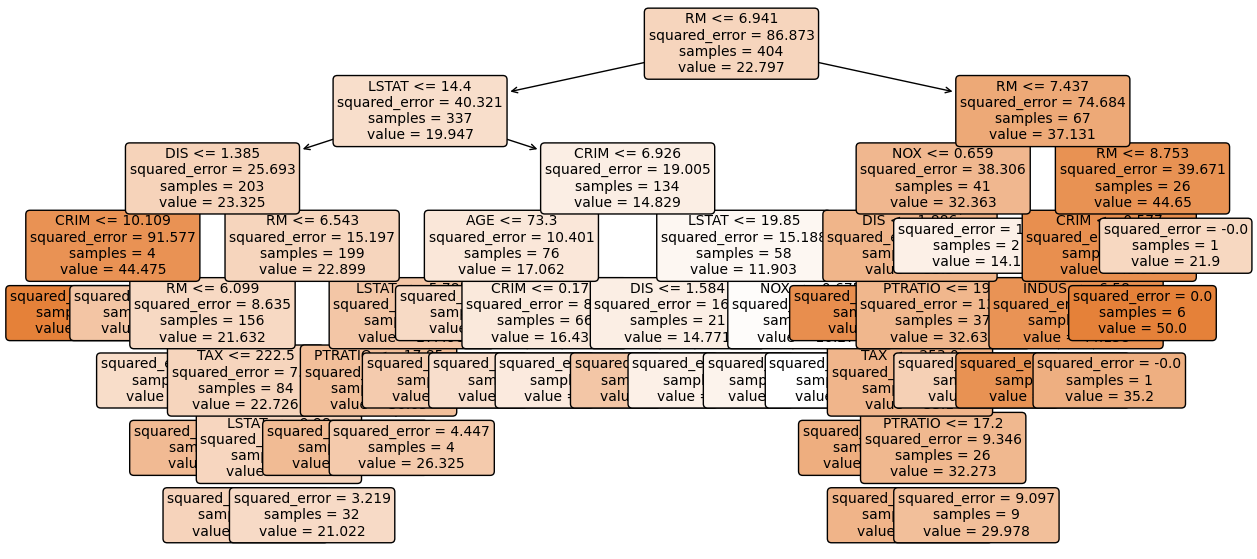

In [61]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualizar a árvore com o valor de alpha escolhido
plt.figure(figsize=(15, 7))
plt.title(f'Árvore de Decisão Podada - Alpha={selected_alpha:.4f}')
plot_tree(pruned_tree_selected_alpha, filled=True, feature_names=X.columns, rounded=True, fontsize=10)
plt.show()
